In [1]:
import pandas as pd
import nltk
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

# Uncomment the following line the first time you run the code
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
reviews = pd.read_csv('cleaned.csv', index_col = 0)

In [3]:
df = reviews.copy()
df.head()

,company,title,name,position,industry,usage,paid_status,source,date,total,...,feature,support,value,recommend,comments,pros,cons,overall,recommendations to other buyers,employees
0,tix,Tix Cares! *Best ticketing Company...Bar none.,Beatriz B.,Marketing Coordinator,Gambling & Casinos,2+ years,NO,Capterra,2019-02-20,5,...,5.0,5.0,5.0,10.0,NaN,Customer service is the BEST! No words can des...,Not many people know about Tix. If more people...,"I had no background on ticketing systems, Tix ...",NaN,1001-5000
1,tix,"Couldn't be more pleased with Tix, Inc.'s web ...",Carleton U.,Treasurer,NaN,NaN,NO,Capterra,2016-04-04,5,...,5.0,5.0,5.0,10.0,After much research into the various vendors f...,NaN,NaN,NaN,NaN,NaN
2,tix,TIX is the answer we needed--Great support and...,Jennifer E.,Data Systems Coordinator,Religious Institutions,Less than 6 months,NO,Capterra,2016-10-13,5,...,5.0,5.0,5.0,10.0,NaN,Patron experience is excellent. Help library i...,Sometimes the reports do not output to excel c...,We wanted an easy-to-use system where patrons ...,NaN,51-200
3,tix,The Excellent Customer Service has made workin...,Rita A.,Box Office Manager,NaN,NaN,NO,Capterra,2016-05-04,4,...,5.0,5.0,5.0,10.0,I have worked with these people and this syste...,NaN,NaN,NaN,NaN,NaN
4,tix,Great ticket company and excellent customer se...,Alan G.,Box Office Manager,NaN,NaN,NO,Capterra,2016-04-22,5,...,5.0,5.0,5.0,10.0,PROS-\n\n-24/7 support and customer service\n\...,NaN,NaN,NaN,NaN,NaN


In [4]:
df_ = df.loc[:, ['company', 'pros', 'cons', 'overall']]

In [5]:
# filter out all posts that have less than 100 reviews
df_100 = df_.groupby('company').filter(lambda x: x.company.value_counts() > 100)

In [6]:
df_100.fillna("", inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [7]:
df_100.head()

,company,pros,cons,overall
0,tix,Customer service is the BEST! No words can des...,Not many people know about Tix. If more people...,"I had no background on ticketing systems, Tix ..."
1,tix,,,
2,tix,Patron experience is excellent. Help library i...,Sometimes the reports do not output to excel c...,We wanted an easy-to-use system where patrons ...
3,tix,,,
4,tix,,,


In [8]:
sample_size = 1000

def sentiment_pros(x):
    sentiment = TextBlob(x['pros']) # change the column name here
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

def sentiment_cons(x):
    sentiment = TextBlob(x['cons']) # change the column name here
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

def sentiment_overall(x):
    sentiment = TextBlob(x['overall']) # change the column name here
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

In [9]:
sample_pro = df_100.sample(sample_size).apply(sentiment_pros, axis=1).groupby('company').agg({'polarity': 'mean', 'subjectivity': 'mean'})
sample_pro = sample_pro.reset_index()
sample_con = df_100.sample(sample_size).apply(sentiment_cons, axis=1).groupby('company').agg({'polarity': 'mean', 'subjectivity': 'mean'})
sample_con = sample_con.reset_index()
sample_overall = df_100.sample(sample_size).apply(sentiment_overall, axis=1).groupby('company').agg({'polarity': 'mean', 'subjectivity': 'mean'})
sample_overall = sample_overall.reset_index()


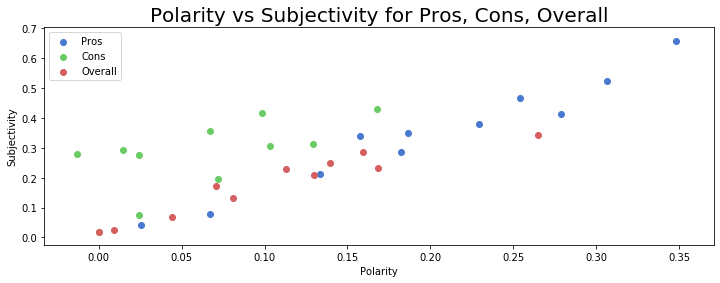

In [13]:
plt.figure(figsize = [12, 4])
plt.scatter(sample_pro['polarity'], sample_pro['subjectivity'], label='Pros')
plt.scatter(sample_con['polarity'], sample_con['subjectivity'], label='Cons')
plt.scatter(sample_overall['polarity'], sample_overall['subjectivity'], label='Overall')
plt.legend(loc='upper left')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Polarity vs Subjectivity for Pros, Cons, Overall', fontsize = 20)
plt.style.use('seaborn-muted')
plt.show()